In [98]:
# Importing Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
# Import API key
from api_keys import g_key

In [99]:
# Creating a reference to the CSV files
twentyone_csv = "Resources/CSV files/2021-08-west-midlands-street.csv"
twenty_csv = "Resources/CSV files/2020-08-west-midlands-street.csv"

# Importing the CSV files into a pandas DataFrame
twentyone_df = pd.read_csv(twentyone_csv)
twenty_df = pd.read_csv(twenty_csv)

In [100]:
main_df=pd.merge(twenty_df,twentyone_df,on=("Crime ID","Crime type","Falls within","Reported by","Location","LSOA code","Longitude","Latitude","LSOA code","LSOA name","Last outcome category","Context","Month"),how="outer")
main_df.head()


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,5e70cb1ff89df7fb6f4579a18cef84ab0529c9e077c229...,2020-08,West Midlands Police,West Midlands Police,-0.195929,51.668072,On or near Greenacre Close,E01000254,Barnet 001D,Public order,Unable to prosecute suspect,NaN
1,b70a6e6bb122531fb9e87fedb6ab19115364b97ba3adab...,2020-08,West Midlands Police,West Midlands Police,-0.192425,51.640933,On or near Sports/Recreation Area,E01000279,Barnet 007C,Public order,Investigation complete; no suspect identified,NaN
2,4a4a7f67480a71be7bc6028c68b9b33fee5a75a0ffb20a...,2020-08,West Midlands Police,West Midlands Police,-0.195913,51.621132,On or near Shortgate,E01000276,Barnet 020A,Robbery,Investigation complete; no suspect identified,NaN
3,7aeed0fbd880da12ee8a6ae698bf2785a94aec8c28084e...,2020-08,West Midlands Police,West Midlands Police,-0.195812,51.589451,On or near Falloden Way,E01000211,Barnet 035C,Robbery,Unable to prosecute suspect,NaN
4,9f50cd3c8c235cbf8b4cb27d379e3dcabfcb7957d0ac32...,2020-08,West Midlands Police,West Midlands Police,-0.199223,51.568533,On or near Dunstan Road,E01000146,Barnet 038D,Public order,Investigation complete; no suspect identified,NaN


# Data cleaning

In [101]:
main_df.drop("Falls within",inplace=True,axis=1)
main_df.drop("Reported by",inplace=True,axis=1)
main_df.drop("LSOA code",inplace=True,axis=1)
main_df.drop("LSOA name",inplace=True,axis=1)
main_df.drop("Context",inplace=True,axis=1)


In [102]:
main_df

,Crime ID,Month,Longitude,Latitude,Location,Crime type,Last outcome category
0,5e70cb1ff89df7fb6f4579a18cef84ab0529c9e077c229...,2020-08,-0.195929,51.668072,On or near Greenacre Close,Public order,Unable to prosecute suspect
1,b70a6e6bb122531fb9e87fedb6ab19115364b97ba3adab...,2020-08,-0.192425,51.640933,On or near Sports/Recreation Area,Public order,Investigation complete; no suspect identified
2,4a4a7f67480a71be7bc6028c68b9b33fee5a75a0ffb20a...,2020-08,-0.195913,51.621132,On or near Shortgate,Robbery,Investigation complete; no suspect identified
3,7aeed0fbd880da12ee8a6ae698bf2785a94aec8c28084e...,2020-08,-0.195812,51.589451,On or near Falloden Way,Robbery,Unable to prosecute suspect
4,9f50cd3c8c235cbf8b4cb27d379e3dcabfcb7957d0ac32...,2020-08,-0.199223,51.568533,On or near Dunstan Road,Public order,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...
60541,cc37e1ce372d715d1eeabedc1b871f1b6d2dafb48a72af...,2021-08,-2.119642,52.580480,On or near Sutherland Place,Violence and sexual offences,Unable to prosecute suspect
60542,4034e3f4b6b0cb3c35880eb8d456ead4da2bdcf79c1bf2...,2021-08,-2.125507,52.582650,On or near Shopping Area,Violence and sexual offences,Status update unavailable
60543,c944868c57ea55fa6163567d96d68de94f637b6578ee09...,2021-08,-2.120034,52.577954,On or near All Saints Road,Violence and sexual offences,Unable to prosecute suspect
60544,f7d6e81113bfd9e37124e4a99e401d1934e3830e92dc1f...,2021-08,-2.125507,52.582650,On or near Shopping Area,Violence and sexual offences,Unable to prosecute suspect


In [103]:
main_df_clean=main_df.dropna()

In [104]:
main_df.loc[main_df["Month"]=="2020-08"]["Crime ID"].count()
print("Fully recorded crimes in August 2020:",main_df.loc[main_df["Month"]=="2020-08"]["Crime ID"].count())

Fully recorded crimes in August 2020: 23644


In [105]:
main_df.loc[main_df["Month"]=="2021-08"]["Crime ID"].count()
print("Fully recorded crimes in August 2021:",main_df.loc[main_df["Month"]=="2021-08"]["Crime ID"].count())

Fully recorded crimes in August 2021: 29446


Text(0.5, 1.0, 'Comparison of number of crimes committed')

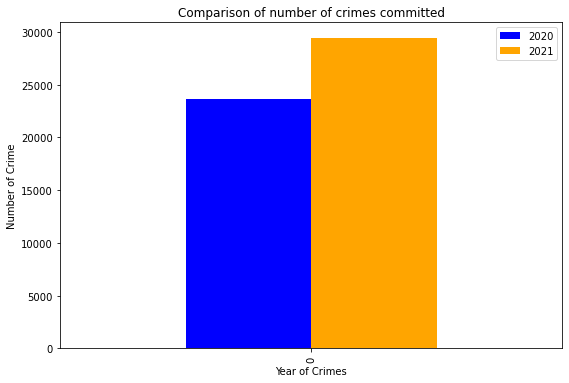

In [106]:
comparison={
    "2020":main_df.loc[main_df["Month"]=="2020-08"]["Crime ID"].count(),
    "2021":main_df.loc[main_df["Month"]=="2021-08"]["Crime ID"].count()
}
comparison=pd.DataFrame([comparison])


bar_plot = comparison.plot.bar( figsize =(9,6), color=["blue", "orange"], rot=90, align='center', linewidth=2), 
plt.xlabel("Year of Crimes")
plt.ylabel("Number of Crime")
plt.title("Comparison of number of crimes committed")
#plt.show()

In [107]:
main_df["Crime type"].unique()

array(['Public order', 'Robbery', 'Anti-social behaviour',
       'Vehicle crime', 'Bicycle theft', 'Other theft',
       'Violence and sexual offences', 'Other crime', 'Burglary',
       'Criminal damage and arson', 'Drugs', 'Shoplifting',
       'Possession of weapons', 'Theft from the person'], dtype=object)

# Comparison of type of crimes

In [108]:
type_of_crime=main_df.groupby("Crime type")

In [109]:
type_of_crime["Crime type"].count()

Crime type
Anti-social behaviour            7456
Bicycle theft                     472
Burglary                         3278
Criminal damage and arson        4604
Drugs                             968
Other crime                       979
Other theft                      3177
Possession of weapons             835
Public order                     5322
Robbery                          1266
Shoplifting                      2133
Theft from the person             461
Vehicle crime                    4610
Violence and sexual offences    24985
Name: Crime type, dtype: int64

In [110]:
type_of_crime2020=main_df.loc[main_df["Month"]=="2020-08"].groupby("Crime type")
count2020=type_of_crime2020["Crime type"].count()

In [111]:
type_of_crime2021=main_df.loc[main_df["Month"]=="2021-08"].groupby("Crime type")
count2021=type_of_crime2021["Crime type"].count()

In [136]:
type_of_crimes_combined={"2021":count2021,
                         "2020":count2020
}
type_of_crimes_combined=pd.DataFrame(type_of_crimes_combined)
type_of_crimes_combined

,2021,2020
Crime type,,
Anti-social behaviour,2649,4807
Bicycle theft,263,209
Burglary,1670,1608
Criminal damage and arson,2425,2179
Drugs,533,435
Other crime,558,421
Other theft,1776,1401
Possession of weapons,535,300
Public order,3041,2281


# Top 5 crimes and comparison of biggest difference in crime

In [113]:
top_5_2020= type_of_crimes_combined['2020'].nlargest(n=5)
top_5_2020

Crime type
Violence and sexual offences    11000
Anti-social behaviour            4807
Public order                     2281
Criminal damage and arson        2179
Vehicle crime                    2067
Name: 2020, dtype: int64

In [114]:
top_5_2021=type_of_crimes_combined['2021'].nlargest(n=5)
top_5_2021

Crime type
Violence and sexual offences    13985
Public order                     3041
Anti-social behaviour            2649
Vehicle crime                    2543
Criminal damage and arson        2425
Name: 2021, dtype: int64

In [115]:
top_5_type_of_crimes_combined={"2020":top_5_2020,
                         "2021":top_5_2021
}
top_5_type_of_crimes_combined=pd.DataFrame(top_5_type_of_crimes_combined)
top_5_type_of_crimes_combined


,2020,2021
Crime type,,
Anti-social behaviour,4807,2649
Criminal damage and arson,2179,2425
Public order,2281,3041
Vehicle crime,2067,2543
Violence and sexual offences,11000,13985


Text(0.5, 1.0, 'Comparison of type of crimes committed')

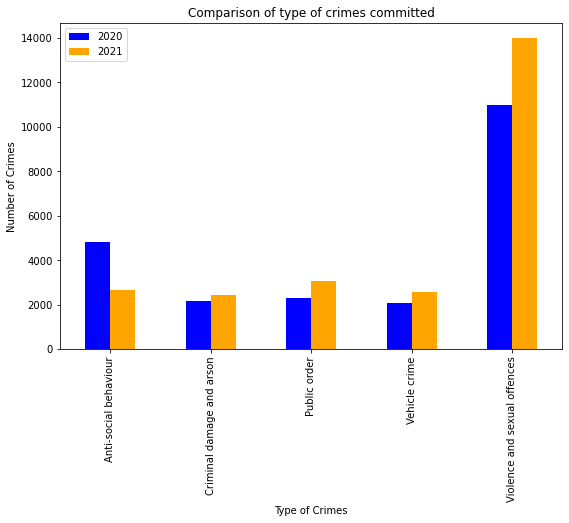

In [116]:
top_5_combined_plot = top_5_type_of_crimes_combined.plot.bar( figsize =(9,6), color=["blue", "orange"], rot=90, linewidth=2), 
plt.xlabel("Type of Crimes")
plt.ylabel("Number of Crimes")
plt.title("Comparison of type of crimes committed")
#plt.show()

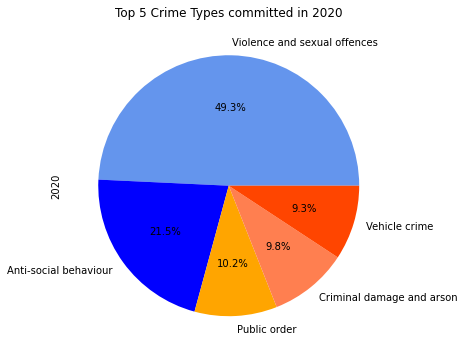

In [117]:
top_5_2020.plot.pie(autopct= "%1.1f%%", colors = ["cornflowerblue", "blue", "orange", "coral", "orangered"], title="Top 5 Crime Types committed in 2020", figsize=(9,6))
plt.show()

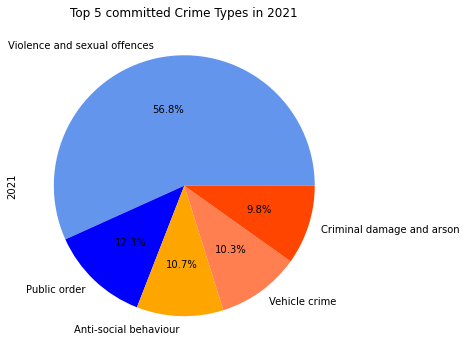

In [118]:
top_5_2021.plot.pie(autopct= "%1.1f%%", colors = ["cornflowerblue", "blue", "orange", "coral", "orangered"], title="Top 5 committed Crime Types in 2021", figsize=(9,6))
plt.show()

In [119]:
top_5_type_of_crimes_combined.reset_index(inplace = True, drop = True)

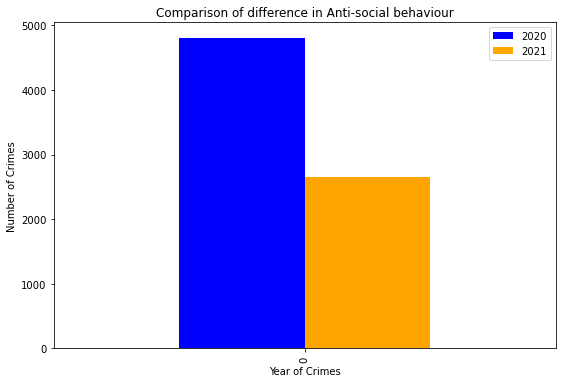

In [120]:
comparison_anti={
   "2020":top_5_type_of_crimes_combined.iloc[0,0],
    "2021":top_5_type_of_crimes_combined.iloc[0,1]
}

comparison_anti=pd.DataFrame([comparison_anti])
#comparison_anti.plot(kind="bar")
#plt.show()

bar_plot = comparison_anti.plot.bar(figsize =(9,6), color=["blue", "orange"], align='center', linewidth=2), 
plt.xlabel("Year of Crimes")
plt.ylabel("Number of Crimes")
plt.title("Comparison of difference in Anti-social behaviour")
plt.savefig("anti-social behaviour")
plt.show()


# Outcome of crimes

In [121]:
outcome2020=main_df.loc[main_df["Month"]=="2020-08"].groupby("Last outcome category")
outcome2020=outcome2020["Last outcome category"].count()
outcome2020

Last outcome category
Action to be taken by another organisation               234
Awaiting court outcome                                    17
Court result unavailable                                1398
Formal action is not in the public interest               64
Further action is not in the public interest               1
Further investigation is not in the public interest       20
Investigation complete; no suspect identified          11376
Local resolution                                         174
Offender given a caution                                 165
Offender given a drugs possession warning                 59
Offender given penalty notice                              6
Status update unavailable                                484
Suspect charged as part of another case                    3
Unable to prosecute suspect                             9643
Name: Last outcome category, dtype: int64

In [122]:
outcome2021=main_df.loc[main_df["Month"]=="2021-08"].groupby("Last outcome category")
outcome2021=outcome2021["Last outcome category"].count()
outcome2021

Last outcome category
Action to be taken by another organisation               261
Awaiting court outcome                                   112
Court result unavailable                                 818
Formal action is not in the public interest                9
Further action is not in the public interest              15
Further investigation is not in the public interest       24
Investigation complete; no suspect identified          13307
Local resolution                                         276
Offender given a caution                                 106
Status update unavailable                               1218
Suspect charged as part of another case                    1
Unable to prosecute suspect                            13299
Name: Last outcome category, dtype: int64

In [123]:
outcome_combined={"2021":outcome2021,
                "2020":outcome2020
}
outcome_combined=pd.DataFrame(outcome_combined)
outcome_combined

,2021,2020
Last outcome category,,
Action to be taken by another organisation,261.0,234
Awaiting court outcome,112.0,17
Court result unavailable,818.0,1398
Formal action is not in the public interest,9.0,64
Further action is not in the public interest,15.0,1
Further investigation is not in the public interest,24.0,20
Investigation complete; no suspect identified,13307.0,11376
Local resolution,276.0,174
Offender given a caution,106.0,165


In [124]:
outcome_combined_top_5_2020=outcome_combined['2021'].nlargest(n=5)
outcome_combined_top_5_2020

Last outcome category
Investigation complete; no suspect identified    13307.0
Unable to prosecute suspect                      13299.0
Status update unavailable                         1218.0
Court result unavailable                           818.0
Local resolution                                   276.0
Name: 2021, dtype: float64

In [125]:
outcome_combined_top_5_2021=outcome_combined['2020'].nlargest(n=5)
outcome_combined_top_5_2021

Last outcome category
Investigation complete; no suspect identified    11376
Unable to prosecute suspect                       9643
Court result unavailable                          1398
Status update unavailable                          484
Action to be taken by another organisation         234
Name: 2020, dtype: int64

In [126]:
outcome_combined_top_5={"2020":outcome_combined_top_5_2020,
                         "2021":outcome_combined_top_5_2021
}
outcome_combined_top_5=pd.DataFrame(outcome_combined_top_5)
outcome_combined_top_5

,2020,2021
Last outcome category,,
Action to be taken by another organisation,NaN,234.0
Court result unavailable,818.0,1398.0
Investigation complete; no suspect identified,13307.0,11376.0
Local resolution,276.0,NaN
Status update unavailable,1218.0,484.0
Unable to prosecute suspect,13299.0,9643.0


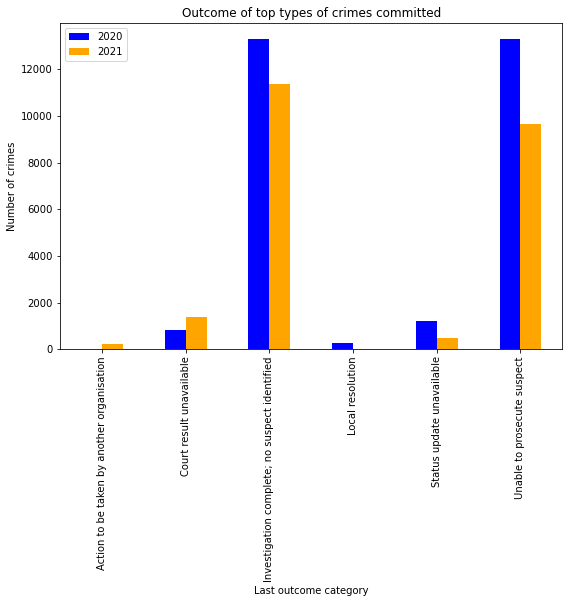

In [127]:
outcome_combined_top_5 = outcome_combined_top_5.plot.bar( figsize =(9,6), color=["blue", "orange"], rot=90, linewidth=2), 
plt.xlabel("Last outcome category")
plt.ylabel("Number of crimes")
plt.title("Outcome of top types of crimes committed")
plt.savefig("outcome_of_top_crimes_committed")
plt.show()

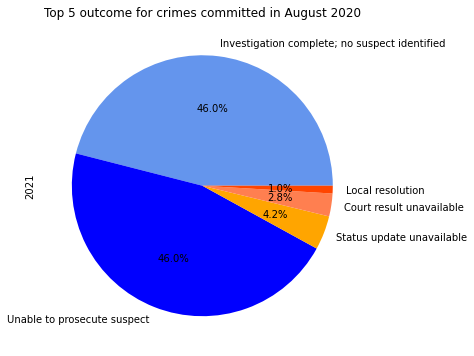

In [128]:
outcome_combined_top_5_2020.plot.pie(autopct= "%1.1f%%", colors = ["cornflowerblue", "blue", "orange", "coral", "orangered"], title="Top 5 outcome for crimes committed in August 2020", figsize=(9,6))
plt.show()


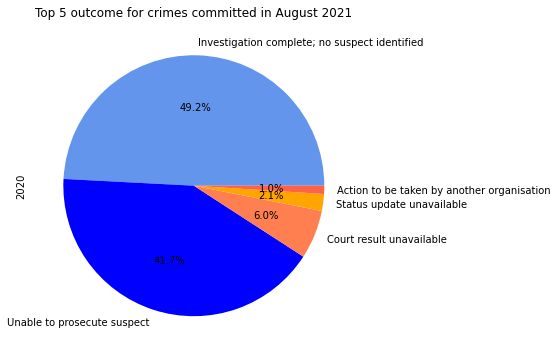

In [129]:
outcome_combined_top_5_2021.plot.pie(autopct= "%1.1f%%", colors = ["cornflowerblue", "blue", "coral","orange", "tomato"], title="Top 5 outcome for crimes committed in August 2021", figsize=(9,6))
plt.show()

In [135]:
main_df.head()


,Crime ID,Month,Longitude,Latitude,Location,Crime type,Last outcome category
0,5e70cb1ff89df7fb6f4579a18cef84ab0529c9e077c229...,2020-08,-0.195929,51.668072,On or near Greenacre Close,Public order,Unable to prosecute suspect
1,b70a6e6bb122531fb9e87fedb6ab19115364b97ba3adab...,2020-08,-0.192425,51.640933,On or near Sports/Recreation Area,Public order,Investigation complete; no suspect identified
2,4a4a7f67480a71be7bc6028c68b9b33fee5a75a0ffb20a...,2020-08,-0.195913,51.621132,On or near Shortgate,Robbery,Investigation complete; no suspect identified
3,7aeed0fbd880da12ee8a6ae698bf2785a94aec8c28084e...,2020-08,-0.195812,51.589451,On or near Falloden Way,Robbery,Unable to prosecute suspect
4,9f50cd3c8c235cbf8b4cb27d379e3dcabfcb7957d0ac32...,2020-08,-0.199223,51.568533,On or near Dunstan Road,Public order,Investigation complete; no suspect identified


In [131]:
main_df_clean.loc[(main_df_clean['Month']=='2020-08')&((main_df_clean['Crime type']=='Violence and sexual offences') | (main_df_clean['Crime type']=='Public order'))]


,Crime ID,Month,Longitude,Latitude,Location,Crime type,Last outcome category
0,5e70cb1ff89df7fb6f4579a18cef84ab0529c9e077c229...,2020-08,-0.195929,51.668072,On or near Greenacre Close,Public order,Unable to prosecute suspect
1,b70a6e6bb122531fb9e87fedb6ab19115364b97ba3adab...,2020-08,-0.192425,51.640933,On or near Sports/Recreation Area,Public order,Investigation complete; no suspect identified
4,9f50cd3c8c235cbf8b4cb27d379e3dcabfcb7957d0ac32...,2020-08,-0.199223,51.568533,On or near Dunstan Road,Public order,Investigation complete; no suspect identified
9,e67fa987a5d135787f7ddda9eff078a23362f48dfc2502...,2020-08,-1.842882,52.599289,On or near Balmoral Road,Violence and sexual offences,Unable to prosecute suspect
10,8783f9e0702566968efddf0e7ec20ffd562b4ecd2c324a...,2020-08,-1.842882,52.599289,On or near Balmoral Road,Violence and sexual offences,Status update unavailable
...,...,...,...,...,...,...,...
28445,ae913718033e217b52fbfbe23267fa031f208f4d76724e...,2020-08,-2.117131,52.579575,On or near Steelhouse Lane,Violence and sexual offences,Unable to prosecute suspect
28446,515e00d69390dcaa461102e8482d813f61713598712521...,2020-08,-2.117939,52.578307,On or near Gower Street,Violence and sexual offences,Unable to prosecute suspect
28447,3d0cd1ae78eeca1a3f02a3aa0065c28b4c1b5d5d5eb69a...,2020-08,-2.117939,52.578307,On or near Gower Street,Violence and sexual offences,Court result unavailable
28448,419e582471427b951d34e57ab043dc219fee2553e43178...,2020-08,-2.084193,52.225664,On or near Harrow Lane,Public order,Investigation complete; no suspect identified


# Plotting heatmap

In [132]:
twenty_clean = main_df_clean.loc[main_df_clean['Month']=='2020-08']
twenty_clean_coords = twenty_clean[['Latitude', 'Longitude']]
twenty_clean_coords_list = twenty_clean_coords.values.tolist()
twenty_clean_coords_list

fig2 = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(twenty_clean_coords_list, max_intensity=10)


# Add layer
fig2.add_layer(heat_layer)

# Display figure
from ipywidgets.embed import embed_minimal_html
embed_minimal_html("maps.html", views=[fig2])
fig2

Figure(layout=FigureLayout(height='420px'))

In [133]:
twenty_clean = main_df_clean.loc[
    (main_df_clean['Month']=='2021-08')&
    ((main_df_clean['Crime type']=='Violence and sexual offences') | 
    (main_df_clean['Crime type']=='Public order') | 
    (main_df_clean['Crime type']=='Vehicle crime') | 
    (main_df_clean['Crime type']=='Criminal damage and arson') | 
    (main_df_clean['Crime type']=='Anti-social behaviour'))]
twenty_clean_coords = twenty_clean[['Latitude', 'Longitude']]
#.drop_duplicates()
twenty_clean_coords_list = twenty_clean_coords.values.tolist()
twenty_clean_coords_list

fig2 = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(twenty_clean_coords_list, max_intensity=10)


# Add layer
fig2.add_layer(heat_layer)

# Display figure
from ipywidgets.embed import embed_minimal_html
embed_minimal_html("maps.html", views=[fig2])

In [134]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

markers = gmaps.marker_layer(twenty_clean_coords_list)
fig.add_layer(markers)

from ipywidgets.embed import embed_minimal_html
embed_minimal_html("maps.html", views=[fig])